# Importing necessary libraries

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


# Creating DataFrame

In [2]:
# Loading the dataset
df = pd.read_csv("C:\\Users\\kaurp\\Downloads\\Algerian_forest_fires_cleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [5]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0


#### The above few cells of the code loads a CSV file containing data on Algerian forest fires into a pandas DataFrame. It then provides an overview of the dataset using df.info(), which displays the number of columns, data types, and missing values per column. The df.isnull().sum() function counts the missing values in each column, while df.head(10) shows the first 10 rows, giving a preview of the data's structure and content for initial exploration.

In [6]:
# Looping through each column in the DataFrame and print the unique values for that column
for column in df.columns:
    print(f"{column}:" ,df[column].unique())

day: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
month: [6 7 8 9]
year: [2012]
Temperature: [29 26 25 27 31 33 30 28 32 34 35 36 37 22 24 38 39 40 42]
RH: [57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 68 75
 76 63 69 70 59 48 45 60 51 52 58 86 74 71 49 44 41 42 90 87 72 46 37 36
 56 43 83 29 34 33 35 39 31 21 40 24 38 26]
Ws: [18 13 22 16 14 15 12 19 21 20 17 26 11 10  9  8  6 29]
Rain: [ 0.   1.3 13.1  2.5  0.2  1.2  0.5  3.1  0.7  0.6  0.3  0.1  0.4  1.
  1.4  0.8 16.8  7.2 10.1  3.8  0.9  1.8  4.6  8.3  5.8  4.   2.   4.7
  8.7  4.5  1.1  1.7  2.2  6.   1.9  2.9  4.1  6.5  4.4]
FFMC: [65.7 64.4 47.1 28.6 64.8 82.6 88.2 86.6 52.9 73.2 84.5 84.  50.  59.
 49.4 36.1 37.3 56.9 79.9 59.8 81.  79.1 81.4 85.9 86.7 86.8 89.  89.1
 88.7 59.9 55.7 63.1 80.1 87.  80.  85.6 66.6 81.1 75.1 81.8 73.9 60.7
 72.6 82.8 85.4 88.1 73.4 68.2 70.  84.3 89.2 90.3 86.5 87.2 78.8 78.
 76.6 85.  86.4 77.1 87.4 88.9 81.3 82.4 80.2 89.3 

In [7]:
# Striping extra spaces from the 'Classes' column
df['Classes']=df['Classes'].str.strip()

# printing the unique values once again
print(df['Classes'].unique())

['not fire' 'fire']


In [8]:
print(df['Classes'].value_counts())

Classes
fire        137
not fire    106
Name: count, dtype: int64


In [9]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


#### The above few cells of thecode first prints the unique values in each column of the DataFrame, helping explore the dataset's distinct entries. It then cleans the 'Classes' column by removing leading and trailing spaces using the str.strip() method, ensuring that categories are properly formatted. After cleaning, the code rechecks and prints the unique values and the frequency distribution of each class in the 'Classes' column using value_counts(). Lastly, the df.describe() function provides descriptive statistics for numerical columns, such as mean, standard deviation, minimum, and maximum values, offering an overview of the data's distribution and key numerical characteristics.

In [10]:
# Map 'fire' to 1 and 'not fire' to 0 in the 'Classes' column
df['Classes']=df['Classes'].map({'fire':1,'not fire':0})

In [11]:
# Print unique values in the 'Classes' column
print(df['Classes'].unique())

[0 1]


In [12]:
# Show the first few rows of the DataFrame
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


#### The above few cells of the code converts categorical labels in the 'Classes' column of the DataFrame to numerical values, mapping 'fire' to 1 and 'not fire' to 0. After the mapping, it prints the unique values in the 'Classes' column to confirm the conversion. The output will display the unique values as an array containing [1, 0]. Finally, the code displays the first few rows of the DataFrame using df.head(), allowing for a quick review of the updated data structure alongside other columns.

# Data Cleaning and Preprocessing
### Effective handling of errors

In [13]:
# Function to count outliers for a given quantile range
def count_outliers(df, column, lower_quantile, upper_quantile):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    
    # Count the outliers below and above the quantile bounds
    outliers_below = df[df[column] < lower_bound].shape[0]
    outliers_above = df[df[column] > upper_bound].shape[0]
    
    return outliers_below + outliers_above

# Function to identify optimal quantile ranges for each column
def find_optimal_quantile(df, columns, min_q=0.01, max_q=0.1, step=0.01):
    quantile_results = {}
    
    for column in columns:
        quantile_range = []
        # Check for multiple quantile ranges
        for q in np.arange(min_q, max_q, step):
            num_outliers = count_outliers(df, column, lower_quantile=q, upper_quantile=1-q)
            quantile_range.append((q, num_outliers))
        
        # Convert to DataFrame for easy reading and sorting by fewest outliers
        results_df = pd.DataFrame(quantile_range, columns=['Quantile', 'Outliers'])
        results_df.sort_values('Outliers', inplace=True)
        
        # Store optimal quantile for this column (fewest outliers)
        optimal_quantile = results_df.iloc[0]
        quantile_results[column] = optimal_quantile
        
    return quantile_results

# Example usage
# Assuming you have a dataframe `data` with the provided metrics
numeric_columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
optimal_quantiles = find_optimal_quantile(df, numeric_columns)

# Display the results
for column, result in optimal_quantiles.items():
    print(f"Column: {column}, Optimal Quantile: {result['Quantile']}, Outliers: {result['Outliers']}")

Column: Temperature, Optimal Quantile: 0.01, Outliers: 3.0
Column: RH, Optimal Quantile: 0.01, Outliers: 4.0
Column: Ws, Optimal Quantile: 0.01, Outliers: 4.0
Column: Rain, Optimal Quantile: 0.01, Outliers: 3.0
Column: FFMC, Optimal Quantile: 0.01, Outliers: 6.0
Column: DMC, Optimal Quantile: 0.01, Outliers: 6.0
Column: DC, Optimal Quantile: 0.01, Outliers: 6.0
Column: ISI, Optimal Quantile: 0.01, Outliers: 3.0
Column: BUI, Optimal Quantile: 0.01, Outliers: 6.0
Column: FWI, Optimal Quantile: 0.01, Outliers: 3.0


#### The above code defines two functions to identify and count outliers in specified columns of a DataFrame. The count_outliers function calculates outliers based on a given quantile range. The find_optimal_quantile function iterates through specified columns, testing various quantile ranges to find the one with the fewest outliers. It stores the optimal quantile for each column in a dictionary. Finally, it prints the optimal quantile and the corresponding number of outliers for each numeric column, providing insights into the data's distribution.

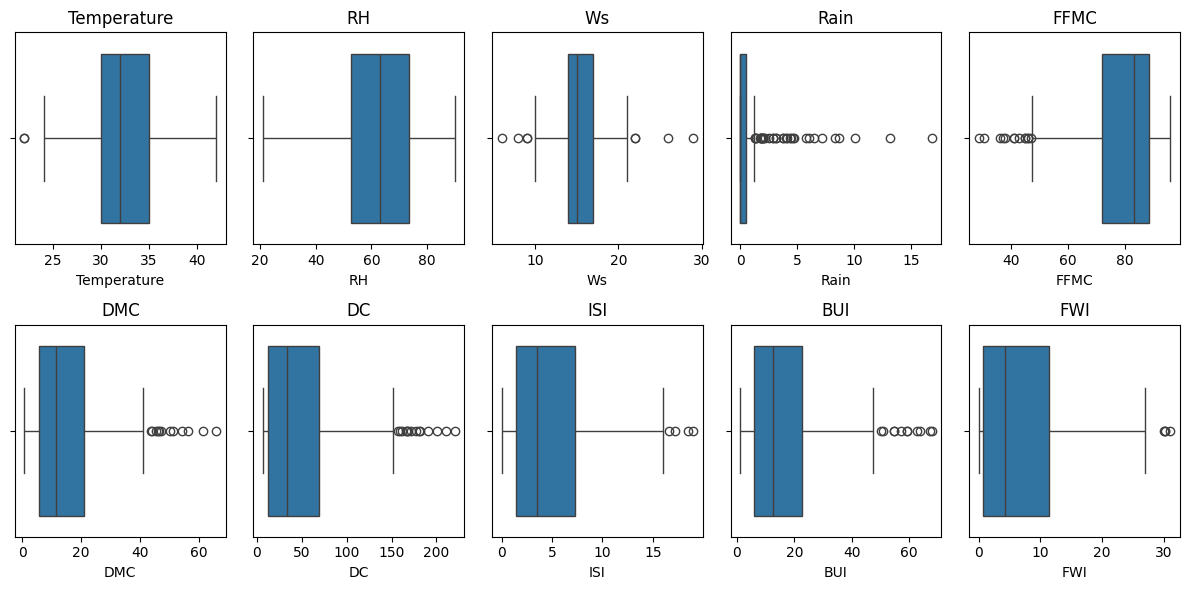

In [14]:
plt.figure(figsize=(12, 6))

# Box plot for numerical features
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


#### This code creates a series of box plots to visualize the distribution of various numerical features in the DataFrame. It initializes a figure with a specified size and iterates over a list of numerical features, generating a subplot for each feature using Seaborn's boxplot function. Each subplot displays the feature’s values, helping to identify potential outliers and the overall distribution. The tight_layout() function ensures the plots are neatly arranged, and plt.show() displays the visualizations, providing insights into the data's spread and variability.

In [15]:
# Function to calculate the number of outliers for a given quantile range
def count_outliers(df, column, lower_quantile, upper_quantile):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    
    # Count the outliers below and above the quantile bounds
    outliers_below = df[df[column] < lower_bound].shape[0]
    outliers_above = df[df[column] > upper_bound].shape[0]
    
    return outliers_below + outliers_above

# List of numeric columns
numeric_columns = ['Rain', 'ISI', 'DC', 'DMC', 'FFMC', 'BUI', 'FWI', 'Temperature']

# Set the quantile range (can adjust lower and upper as needed)
lower_quantile = 0.4
upper_quantile = 0.6

# Display the number of outliers for each numeric column
for column in numeric_columns:
    num_outliers = count_outliers(df, column, lower_quantile, upper_quantile)
    print(f"Column: {column}, Outliers Count: {num_outliers}")

Column: Rain, Outliers Count: 92
Column: ISI, Outliers Count: 190
Column: DC, Outliers Count: 194
Column: DMC, Outliers Count: 194
Column: FFMC, Outliers Count: 192
Column: BUI, Outliers Count: 193
Column: FWI, Outliers Count: 191
Column: Temperature, Outliers Count: 174


#### This code defines a function to count outliers in specified numeric columns of a DataFrame based on given quantile ranges. It sets the lower and upper quantiles to 0.4 and 0.6, respectively, indicating the range of interest for outlier detection. The code then iterates through a list of numeric columns, calculating and printing the number of outliers for each column using the count_outliers function. The output reveals how many values fall outside the specified quantile range, providing insight into data variability.

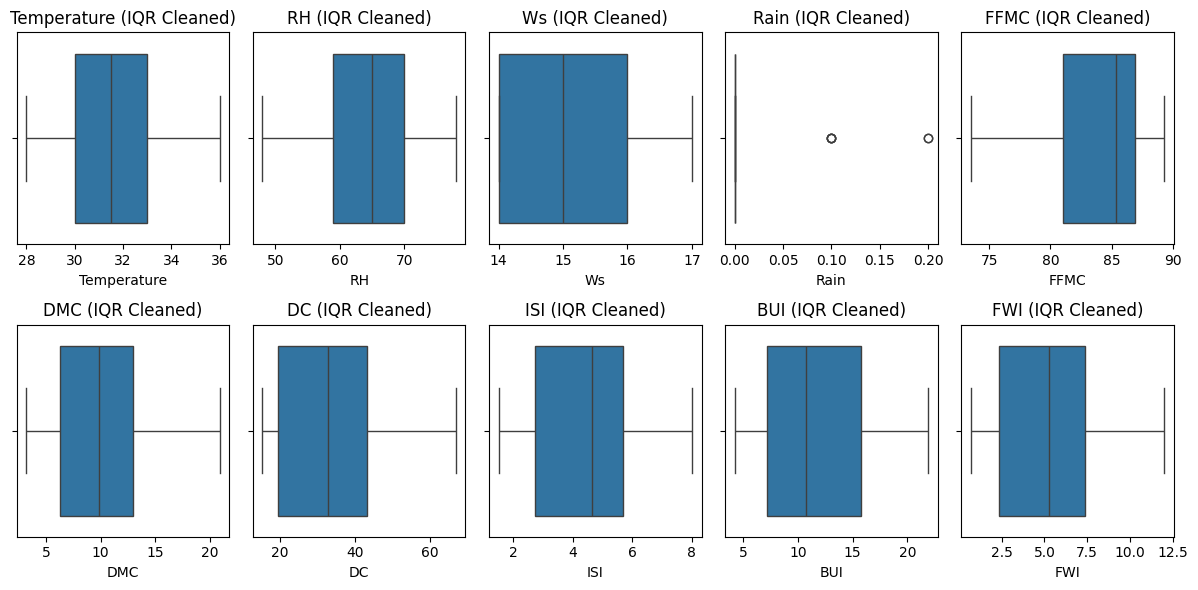

In [16]:
# List of numerical features in your dataset
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# 1. Handling Outliers Using IQR Method
def handle_outliers_iqr(data):
    Q1 = data.quantile(0.4)
    Q3 = data.quantile(0.6)
    IQR = Q3 - Q1
    # Keep only those rows that are not outliers
    data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_clean


# Applying IQR and Z-score methods to handle outliers
X = df[numerical_features]  # Assuming your data is in df

# Applying IQR Method
X_cleaned_iqr = handle_outliers_iqr(X)

# 3. Box plot to visualize the numerical features after handling outliers with IQR
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=X_cleaned_iqr[feature])
    plt.title(f'{feature} (IQR Cleaned)')

plt.tight_layout()
plt.show()

#### This code handles outliers in numerical features using the Interquartile Range (IQR) method. It defines a function that calculates the first (Q1) and third (Q3) quartiles, determines the IQR, and filters out any rows that contain outliers beyond 1.5 times the IQR. The cleaned data is then visualized through box plots for each numerical feature, showcasing the distribution after outlier removal. The box plots reveal improved data consistency, with reduced influence from extreme values, enhancing the overall analysis of the dataset.

In [17]:
# Generate descriptive statistics for the DataFrame
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


#### The code df.describe() generates descriptive statistics for all numerical columns in the DataFrame. The output includes metrics like count, mean, standard deviation, minimum, maximum, and percentiles (25th, 50th, and 75th). These statistics provide insights into the data’s central tendencies, spread, and overall distribution, helping identify any potential outliers or anomalies and offering a quick summary of the dataset’s key numerical characteristics.

In [18]:
correlation_matrix = df.corr()  # This computes the correlation matrix

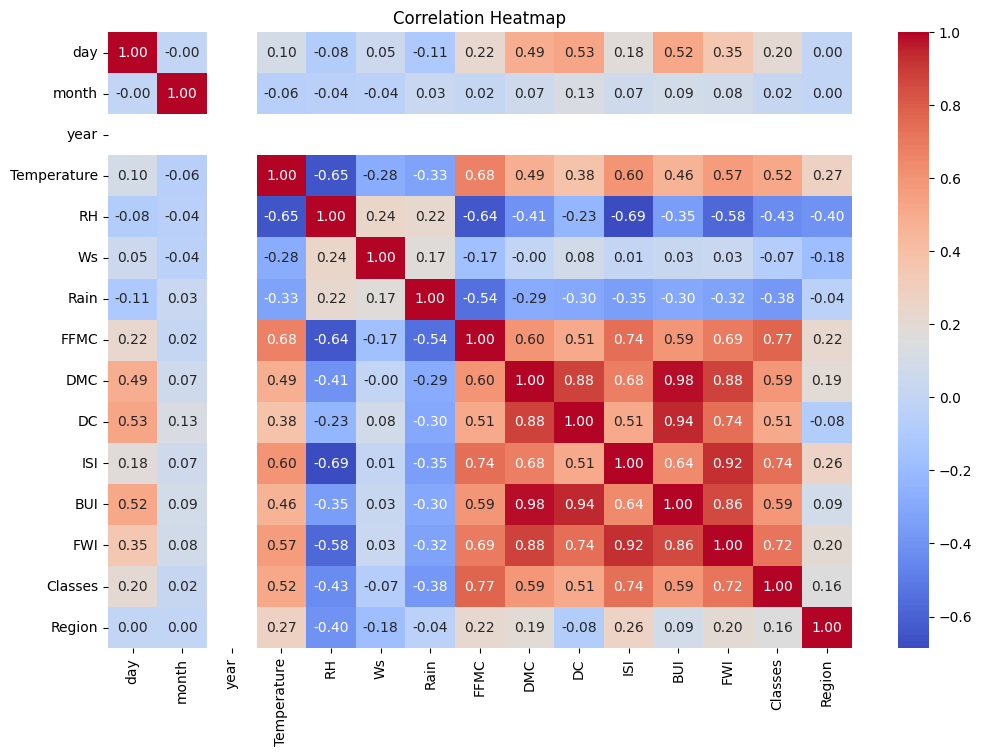

In [19]:
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### This code computes the correlation matrix for the DataFrame using df.corr(), which quantifies the linear relationship between numerical features. It then visualizes this matrix as a heatmap using Seaborn’s heatmap() function, with annotations showing the correlation coefficients formatted to two decimal places. The color map 'coolwarm' visually differentiates between positive and negative correlations. The output heatmap provides an intuitive overview of how features correlate with one another, aiding in feature selection and understanding relationships within the dataset.

# Data Visualization and Observations
## Creating insightful visualizations that accurately represent the dataset.
## Clear and meaningful observations derived from the visualizations.

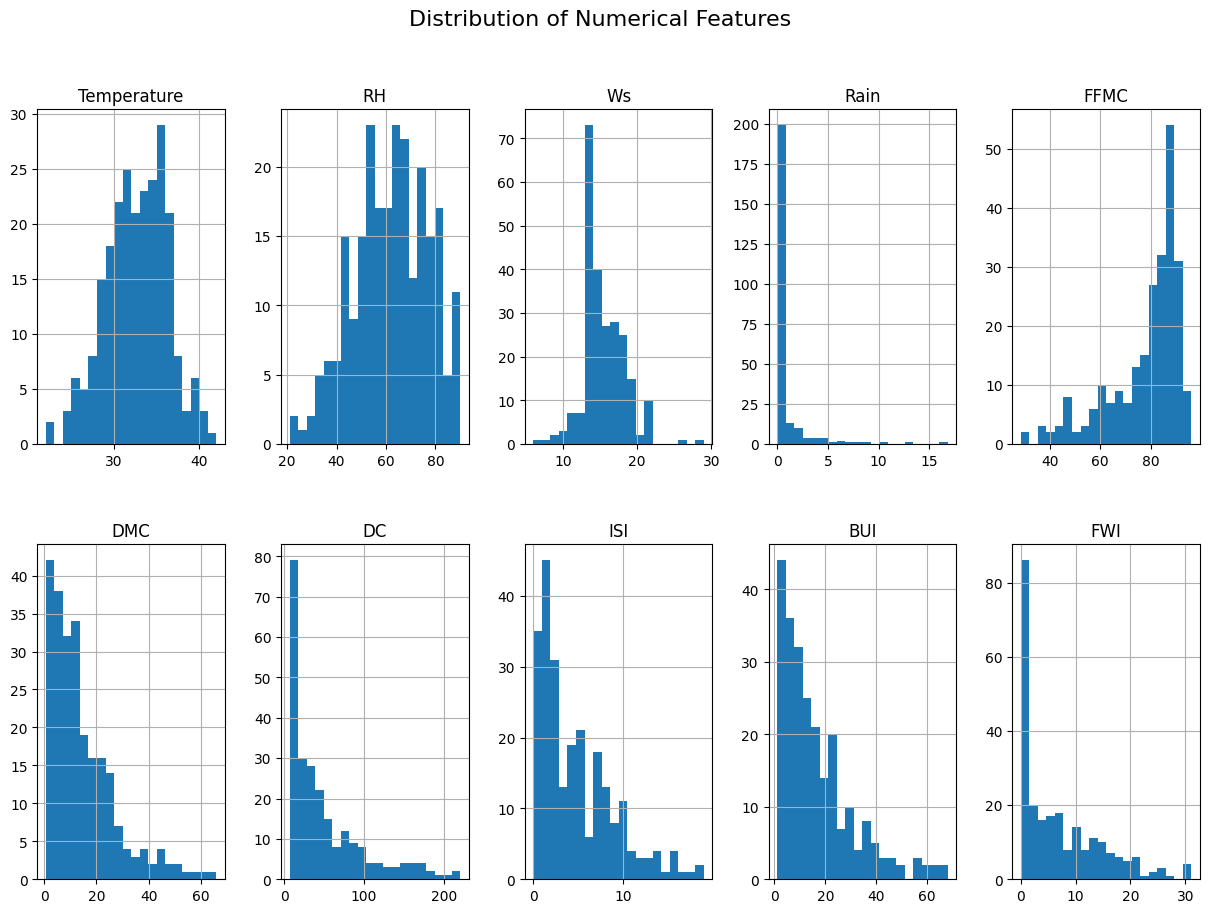

In [20]:
# Histograms for numerical features
df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(2, 5))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


#### This code generates histograms for each numerical feature in the DataFrame using df[numerical_features].hist(). It specifies 20 bins for the histograms and arranges them in a 2x5 layout within a figure sized 15x10 inches. The plt.suptitle() function adds a title, "Distribution of Numerical Features," to the entire plot. The output displays the distribution of each numerical feature, allowing for visual assessment of their frequency distributions, skewness, and potential outliers, aiding in data analysis and understanding.

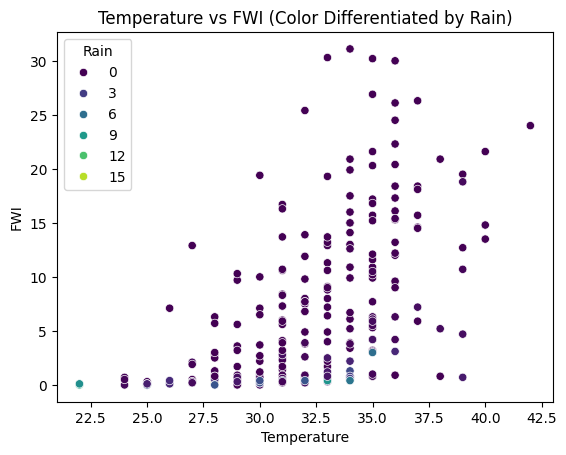

In [21]:
# Scatter plot between Temperature and FWI with color differentiation based on Rain
sns.scatterplot(x='Temperature', y='FWI', hue='Rain', data=df, palette='viridis')
plt.title('Temperature vs FWI (Color Differentiated by Rain)')
plt.show()



#### This code creates a scatter plot using Seaborn to visualize the relationship between 'Temperature' and 'FWI' (Fire Weather Index). The points are color-coded based on the 'Rain' variable using the 'viridis' color palette, allowing for easy differentiation of how rainfall influences the relationship. The plt.title() function adds a descriptive title to the plot. The output provides insights into how temperature and FWI correlate while illustrating the impact of rainfall, helping identify trends and patterns in the data.

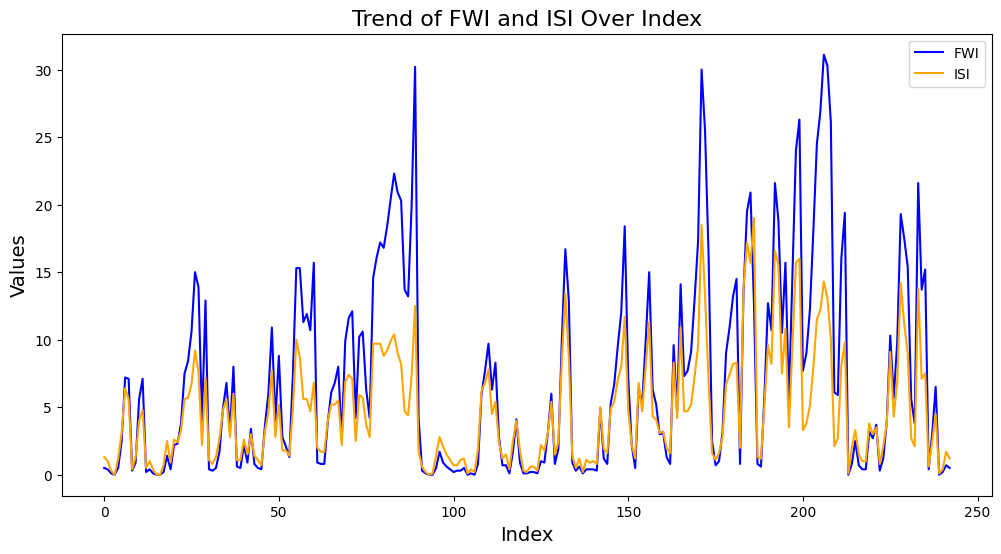

In [22]:
# Line plot for FWI and Rain over an index (assumed to be time series)
plt.figure(figsize=(12, 6))

# Plot FWI
plt.plot(df['FWI'], label='FWI', color='blue')

# Plot Rain
plt.plot(df['ISI'], label='ISI', color='orange')

# Enhance the plot with titles and labels
plt.title('Trend of FWI and ISI Over Index', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Add a legend to differentiate the lines
plt.legend()

# Show the plot
plt.show()


#### This code generates a line plot to visualize the trends of 'FWI' (Fire Weather Index) and 'ISI' (Initial Spread Index) over an index, which is assumed to represent time. It initializes a figure with a specified size and plots 'FWI' in blue and 'ISI' in orange for clear differentiation. The plot is enhanced with titles and axis labels for clarity, and a legend is added to identify each line. The output displays how both indices change over time, facilitating the analysis of their trends and relationships.

C:\Users\kaurp\AppData\Local\Temp\ipykernel_14988\2940561941.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Region', y='FWI', data=df, inner='quartile', palette='muted')


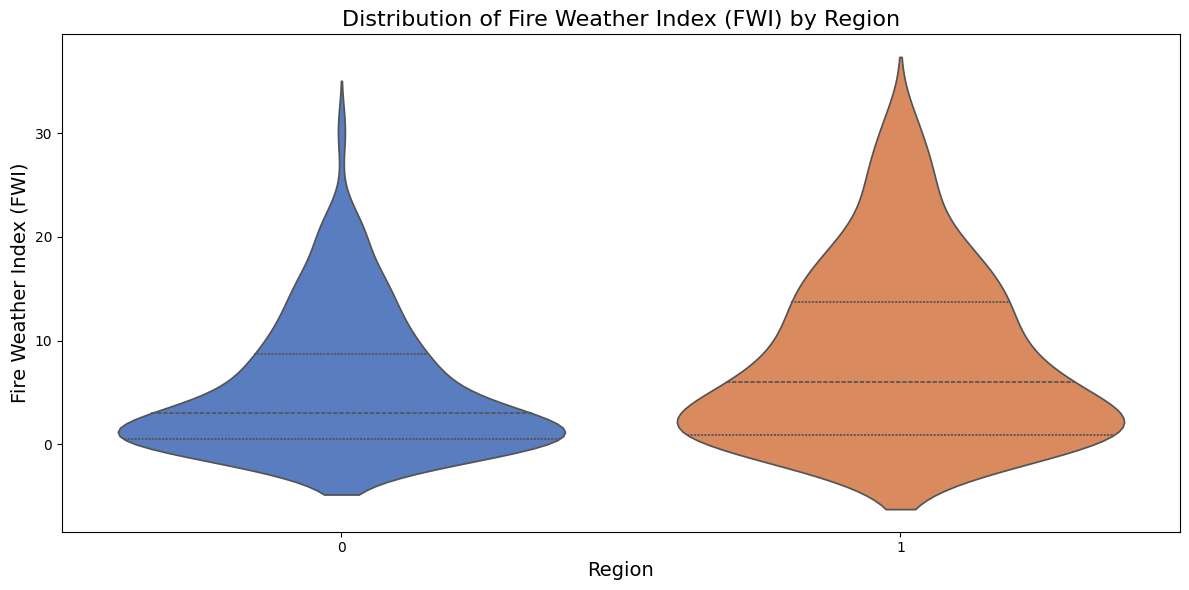

In [23]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a violin plot of FWI grouped by Region
sns.violinplot(x='Region', y='FWI', data=df, inner='quartile', palette='muted')

# Enhance the plot with title and labels
plt.title('Distribution of Fire Weather Index (FWI) by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Fire Weather Index (FWI)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


#### This code creates a violin plot to visualize the distribution of the Fire Weather Index (FWI) across different regions in the dataset. It sets the figure size and uses Seaborn's violinplot() function, grouping the FWI values by 'Region' with an inner quartile representation. The plot is enhanced with a title and labeled axes for clarity. The output displays the density and distribution of FWI values for each region, allowing for easy comparison and identification of variations in fire weather conditions across different areas.

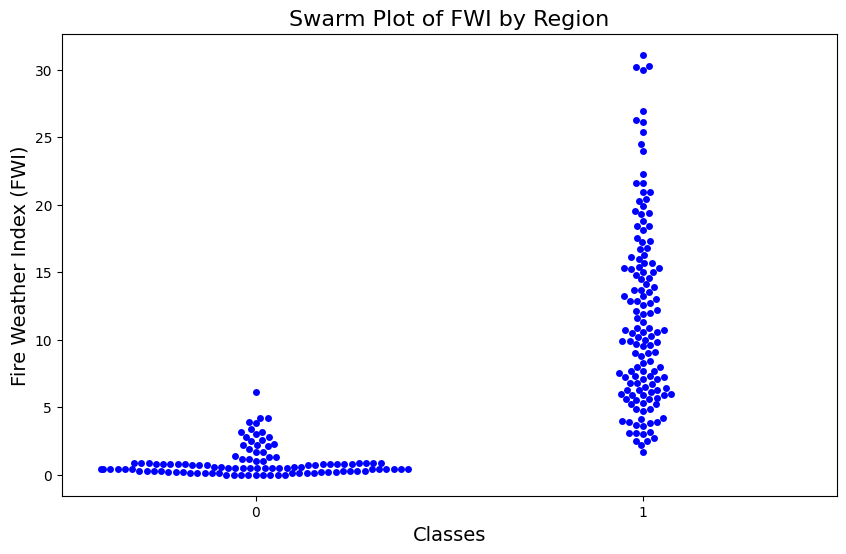

In [24]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Classes', y='FWI', data=df, color='blue')
plt.title('Swarm Plot of FWI by Region', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Fire Weather Index (FWI)', fontsize=14)
plt.show()


#### This code generates a swarm plot to visualize the distribution of the Fire Weather Index (FWI) categorized by 'Classes' in the dataset. The figure size is set to 10x6 inches, and the swarm plot is created using Seaborn's swarmplot() function, displaying individual data points in blue for clarity. The plot is enhanced with a title and labeled axes. The output shows how FWI values are distributed across different classes, allowing for an examination of patterns and variations within the data.

# Model Development and Analysis (1.5 Marks)
### Implementation of multiple linear regression and polynomial regression models.
### Application of regularization techniques (Lasso, Ridge, etc.).
### Effective use of cross-validation and hyperparameter tuning.

In [25]:
# Define features and target variable
x = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']]  # feature selection
y = df['Classes']  # Target variable


In [26]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [27]:
# normalisation

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [28]:
# Save the StandardScaler model as a .pkl file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("\nModel saved as 'scaler_file.pkl'")



Model saved as 'scaler_file.pkl'


#### The above cells of code prepares the dataset for modeling by defining features and the target variable. It selects relevant features from the DataFrame (x) and specifies 'Classes' as the target variable (y). The dataset is then split into training and testing sets, with 20% reserved for testing. The StandardScaler is applied to normalize the feature values, enhancing model performance. Finally, the fitted scaler model is saved as a .pkl file, allowing for consistent data transformation during future predictions, with a confirmation message printed upon saving.

In [29]:
# build the model

from sklearn.linear_model import LinearRegression 

In [30]:
lr=LinearRegression()

In [31]:
# train the model
lr.fit(x_train,y_train)

LinearRegression()

#### This code builds a linear regression model using scikit-learn. It imports the LinearRegression class and initializes an instance of the model (lr). The model is then trained on the training data (x_train) and the corresponding target variable (y_train) using the fit() method. This process estimates the coefficients for the linear relationship between the features and the target variable, enabling the model to make predictions on new data. The output indicates that the model is now trained and ready for evaluation or prediction tasks.

In [32]:
# predict the values

y_pred=lr.predict(x_test)

In [33]:
# Evaluate the performance of the trained linear regression model by calculating R2, MSE, MAE, RMSE on the test dataset.

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print("r2_score",r2_score(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.66259729603301
mean_squared_error 0.08347238906971766
mean_absolute_error 0.24796311427950965
RMSE 0.28891588580366717


#### This code predicts the target variable values using a trained linear regression model, storing the results in y_pred. It then evaluates the model's performance by calculating four key metrics: R-squared (R²), Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE). These metrics provide insights into the model's accuracy and predictive power. The output displays the computed values for each metric, enabling assessment of how well the model performs on the test dataset.

In [34]:
# Define a function to test different degrees of polynomial regression
def polynomial_regression(x_train, y_train, x_test, y_test, max_degree=5):
    results = []
    
    for degree in range(1, max_degree + 1):
        # Create polynomial features for the given degree
        poly = PolynomialFeatures(degree=degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        
        # Create and fit the Linear Regression model for polynomial regression
        poly_model = LinearRegression()
        poly_model.fit(x_train_poly, y_train)
        
        # Predict on the polynomial test set
        y_pred_poly = poly_model.predict(x_test_poly)
        
        # Calculate performance metrics
        r2 = r2_score(y_test, y_pred_poly)
        mse = mean_squared_error(y_test, y_pred_poly)
        mae = mean_absolute_error(y_test, y_pred_poly)
        rmse = np.sqrt(mse)
        
        # Append the results for this degree
        results.append({
            'Degree': degree,
            'R2 Score': r2,
            'MSE': mse,
            'MAE': mae,
            'RMSE': rmse
        })
    
    # Convert results to a DataFrame for easier reading
    results_df = pd.DataFrame(results)
    
    return results_df

# Example usage (assuming x_train, y_train, x_test, and y_test are already defined)
results_df = polynomial_regression(x_train, y_train, x_test, y_test, max_degree=5)

# Display results for each degree
print(results_df)

# Find the degree with the best R2 score or lowest RMSE
best_degree_r2 = results_df.loc[results_df['R2 Score'].idxmax()]
best_degree_rmse = results_df.loc[results_df['RMSE'].idxmin()]

print("\nBest degree based on R2 Score:", best_degree_r2)
print("\nBest degree based on RMSE:", best_degree_rmse)


   Degree    R2 Score         MSE       MAE       RMSE
0       1    0.662597    0.083472  0.247963   0.288916
1       2   -1.298574    0.568660  0.292526   0.754096
2       3  -58.726378   14.776122  1.704916   3.843972
3       4 -391.548300   97.115240  2.699498   9.854706
4       5 -947.698118  234.704990  3.921741  15.320085

Best degree based on R2 Score: Degree      1.000000
R2 Score    0.662597
MSE         0.083472
MAE         0.247963
RMSE        0.288916
Name: 0, dtype: float64

Best degree based on RMSE: Degree      1.000000
R2 Score    0.662597
MSE         0.083472
MAE         0.247963
RMSE        0.288916
Name: 0, dtype: float64


#### This code defines a function, polynomial_regression, that tests polynomial regression models of varying degrees (from 1 to a specified maximum). For each degree, it creates polynomial features, fits a linear regression model, and predicts outcomes. The function calculates performance metrics—R², Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)—and stores the results in a DataFrame. After executing the function, it identifies and displays the best polynomial degree based on the highest R² score and lowest RMSE.

In [35]:
poly = PolynomialFeatures(degree=1)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create a Linear Regression model for polynomial regression
poly_model = LinearRegression()

# Fit the model on the polynomial training data
poly_model.fit(x_train_poly, y_train)

# Predict on the polynomial test set
y_pred_poly = poly_model.predict(x_test_poly)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print("r2_score",r2_score(y_test,y_pred_poly))
print("mean_squared_error",mean_squared_error(y_test,y_pred_poly))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_poly))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_poly)))

r2_score 0.66259729603301
mean_squared_error 0.08347238906971763
mean_absolute_error 0.2479631142795097
RMSE 0.2889158858036671


#### This code implements a polynomial regression model with a degree of 1 (linear regression). It first generates polynomial features for the training and testing datasets using PolynomialFeatures. Then, it creates a linear regression model and fits it to the polynomial training data. Predictions are made on the polynomial test set, and various performance metrics—R² score, Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE)—are calculated and printed. These metrics evaluate the model's predictive accuracy.

In [36]:
# Save the polynomial regression model as a .pkl file
with open('poly_regression_features.pkl', 'wb') as poly_regression_features_file:
    pickle.dump(poly, poly_regression_features_file)

print("\nModel saved as 'poly_regression_features.pkl'")



Model saved as 'poly_regression_features.pkl'


In [37]:
# Save the polynomial regression model as a .pkl file
with open('poly_regression.pkl', 'wb') as poly_regression_file:
    pickle.dump(poly_model, poly_regression_file)

print("\nModel saved as 'poly_regression.pkl'")



Model saved as 'poly_regression.pkl'


#### This code saves two components of the polynomial regression model as .pkl files for later use. First, it serializes the PolynomialFeatures object, which defines the polynomial degree and transformations, into a file named poly_regression_features.pkl. Next, it saves the fitted polynomial regression model (poly_model) into another file named poly_regression.pkl. The pickle library is used for serialization, allowing the models to be easily loaded in future sessions for predictions or analysis.

REGULARIZATION MODELS (RIDGE,LASSO,ELASTIC NET)

In [38]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [39]:
ls=Lasso()
rd=Ridge()
en=ElasticNet()

In [40]:
# train the model with ridge
rd.fit(x_train,y_train)

print(rd.coef_, rd.intercept_)
y_pred_tr_rd=rd.predict(x_train)
y_pred_rd=rd.predict(x_test)

print()
print("----------------------------------------------------------------")
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_rd))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_rd))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_rd))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_rd)))
print()
print("----------------------------------------------------------------")
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_rd))
print("mean_squared_error",mean_squared_error(y_test,y_pred_rd))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_rd))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_rd)))

[-0.00311029  0.14362125 -0.02903077  0.04617061  0.32020174 -0.10303872
  0.03717467  0.14143965  0.00918448  0.16268801] 0.5670103092783505

----------------------------------------------------------------
Metrices on train_data
r2_score 0.7217203165899666
mean_squared_error 0.06832033889650091
mean_absolute_error 0.21158766715669852
RMSE 0.26138159632327007

----------------------------------------------------------------
Metrices on test_data
r2_score 0.6544504866808343
mean_squared_error 0.0854878845945791
mean_absolute_error 0.2523577427060558
RMSE 0.2923831127041695


In [41]:
# Save the trained Ridge model as a .pkl file
with open('ridge_model.pkl', 'wb') as ridge_model_file:
    pickle.dump(rd, ridge_model_file)

print("\nModel saved as 'ridge_model.pkl'")



Model saved as 'ridge_model.pkl'


#### This code implements and evaluates a Ridge regression model using training and test datasets. It first initializes the Ridge regression model and fits it to the training data (x_train and y_train). The model's coefficients and intercept are printed, followed by predictions for both training and test datasets. The performance metrics (R² score, mean squared error, mean absolute error, and RMSE) are calculated and displayed for both datasets. Finally, the trained Ridge model is saved as a .pkl file for future use.

In [42]:
# train the ls model
ls.fit(x_train,y_train)

print(ls.coef_, ls.intercept_)
y_pred_tr_ls=ls.predict(x_train)
y_pred_ls=ls.predict(x_test)

print()
print("----------------------------------------------------------------")
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_ls))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_ls))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_ls))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_ls)))
print()
print("----------------------------------------------------------------")
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_ls))
print("mean_squared_error",mean_squared_error(y_test,y_pred_ls))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_ls))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_ls)))

[ 0. -0. -0. -0.  0.  0.  0.  0.  0.  0.] 0.5670103092783505

----------------------------------------------------------------
Metrices on train_data
r2_score 0.0
mean_squared_error 0.24550961845041983
mean_absolute_error 0.49101923690083965
RMSE 0.4954892717813574

----------------------------------------------------------------
Metrices on test_data
r2_score -0.0010334685645558839
mean_squared_error 0.24765259488852404
mean_absolute_error 0.49316221333894383
RMSE 0.4976470585550808


In [43]:
# Save the trained Lasso model as a .pkl file
with open('lasso_model.pkl', 'wb') as lasso_model_file:
    pickle.dump(ls, lasso_model_file)

print("\nModel saved as 'lasso_model.pkl'")



Model saved as 'lasso_model.pkl'


#### This code trains a Lasso regression model on the training dataset (x_train, y_train) and evaluates its performance. After fitting the model, it prints the coefficients and intercept values. Predictions are made for both the training and test datasets, and several performance metrics (R² score, mean squared error, mean absolute error, and RMSE) are calculated and displayed for each dataset. Finally, the trained Lasso model is saved as a .pkl file, allowing for future use without retraining.

In [44]:
# train the lr model
lr.fit(x_train,y_train)

print(lr.coef_, lr.intercept_)
y_pred_tr_lr=lr.predict(x_train)
y_pred_lr=lr.predict(x_test)

print()
print("----------------------------------------------------------------")
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_lr))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_lr))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_lr))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_lr)))
print()
print("----------------------------------------------------------------")
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_lr))
print("mean_squared_error",mean_squared_error(y_test,y_pred_lr))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

[-0.00375435  0.14709419 -0.03010242  0.0476795   0.32530307 -0.25441845
 -0.03727244  0.13329918  0.21687629  0.18116792] 0.5670103092783505

----------------------------------------------------------------
Metrices on train_data
r2_score 0.7221156244469844
mean_squared_error 0.06822328701535402
mean_absolute_error 0.21052012063387796
RMSE 0.2611958786339364

----------------------------------------------------------------
Metrices on test_data
r2_score 0.66259729603301
mean_squared_error 0.08347238906971766
mean_absolute_error 0.24796311427950965
RMSE 0.28891588580366717


In [45]:
# Save the trained Linear Regression model as a .pkl file
with open('linear_regression_model.pkl', 'wb') as linear_regression_model_file:
    pickle.dump(lr, linear_regression_model_file)

print("\nModel saved as 'linear_regression_model.pkl'")



Model saved as 'linear_regression_model.pkl'


#### This code trains a linear regression model (lr) using the training dataset (x_train, y_train). After fitting the model, it prints the coefficients and intercept. The model's performance is evaluated on both the training and test datasets by calculating various metrics: R² score, mean squared error, mean absolute error, and RMSE. Finally, the trained linear regression model is saved as a .pkl file, allowing for future use without the need to retrain the model.

In [46]:
# train the en model
en.fit(x_train,y_train)

print(en.coef_, en.intercept_)
y_pred_tr_en=en.predict(x_train)
y_pred_en=en.predict(x_test)

print()
print("----------------------------------------------------------------")
print("Metrices on train_data")
print("r2_score",r2_score(y_train,y_pred_tr_en))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_en))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_en))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_en)))
print()
print("----------------------------------------------------------------")
print("Metrices on test_data")
print("r2_score",r2_score(y_test,y_pred_en))
print("mean_squared_error",mean_squared_error(y_test,y_pred_en))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_en))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_en)))

[ 0. -0. -0. -0.  0.  0.  0.  0.  0.  0.] 0.5670103092783505

----------------------------------------------------------------
Metrices on train_data
r2_score 0.0
mean_squared_error 0.24550961845041983
mean_absolute_error 0.49101923690083965
RMSE 0.4954892717813574

----------------------------------------------------------------
Metrices on test_data
r2_score -0.0010334685645558839
mean_squared_error 0.24765259488852404
mean_absolute_error 0.49316221333894383
RMSE 0.4976470585550808


In [47]:
# Save the trained ElasticNet model as a .pkl file
with open('elasticnet_model.pkl', 'wb') as elasticnet_model_file:
    pickle.dump(en, elasticnet_model_file)

print("\nModel saved as 'elasticnet_model.pkl'")



Model saved as 'elasticnet_model.pkl'


#### This code snippet trains an ElasticNet regression model (en) using the training dataset (x_train, y_train). After fitting the model, it prints the coefficients and intercept. The model's performance is assessed on both the training and test datasets by calculating various metrics: R² score, mean squared error, mean absolute error, and RMSE. Finally, the trained ElasticNet model is saved as a .pkl file, ensuring it can be reused later without needing to retrain the model.

In [48]:
# Define the distribution of alpha values (can be uniform or loguniform)
alpha_distribution = {'alpha': uniform(0.01, 100)}  # Range from 0.01 to 100

# Initialize Ridge model
ridge = Ridge()

# Perform Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(ridge, param_distributions=alpha_distribution, n_iter=100, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the model on the training data
random_search.fit(x_train, y_train)

# Get the best alpha
best_alpha = random_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

# Compute performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test R2 Score: {r2}')

Best alpha: 3.4488521115218393
Test MSE: 0.08659656366650678
Test R2 Score: 0.6499691088160222


In [49]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_ridge.pkl', 'wb') as CV_ridge_model_file:
    pickle.dump(rd, CV_ridge_model_file)

print("\nModel saved as 'CV_ridge_model.pkl'")



Model saved as 'CV_ridge_model.pkl'


#### This code performs hyperparameter tuning for a Ridge regression model using Randomized Search. It defines a range of alpha values and initializes the Ridge model. The RandomizedSearchCV function conducts a 5-fold cross-validation to identify the optimal alpha value based on negative mean squared error. After fitting the model, it prints the best alpha and evaluates the model's performance on the test set using mean squared error and R² score. Finally, it saves the tuned model as a .pkl file for future use.

In [50]:
# Define the parameter grid for alpha values (regularization strength)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the Lasso model
lasso = Lasso()

# Set up the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lasso, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error',  # Use MSE as the metric
                           cv=5)

# Fit the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best alpha (the one with the lowest cross-validation error)
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Train the Lasso model with the best alpha on the full training data
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lasso_best.predict(x_test)

# Evaluation metrics on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Test MSE: {mse}')
print(f'Test R2 Score: {r2}')

Best Alpha: 0.01
Test MSE: 0.09157310303551991
Test R2 Score: 0.6298535010298261


In [51]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_lasso.pkl', 'wb') as CV_lasso_model_file:
    pickle.dump(ls, CV_lasso_model_file)

print("\nModel saved as 'CV_lasso_model.pkl'")



Model saved as 'CV_lasso_model.pkl'


#### This code performs hyperparameter tuning for a Lasso regression model using Grid Search. It defines a parameter grid with various alpha values to assess regularization strength and initializes the Lasso model. A 5-fold cross-validation is set up to identify the optimal alpha based on negative mean squared error. After fitting the model, the best alpha is printed. The Lasso model is retrained using this optimal alpha, and predictions are made on the test set, yielding mean squared error and R² score. Finally, the tuned model is saved as a .pkl file.

In [52]:
# Initialize the Elastic Net model
en = ElasticNet()

# Cross-Validation for Elastic Net (5-fold cross-validation)
cv_scores = cross_val_score(en, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate and print the average cross-validation mean squared error
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

# Fit the Elastic Net model on the training data
en.fit(x_train, y_train)

# Make predictions on the test set
y_pred = en.predict(x_test)

# Evaluate the performance of the model on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Test MSE: {mse}')
print(f'Test R2 Score: {r2}')

Cross-Validation MSE: 0.2488174305006215


Test MSE: 0.24765259488852404
Test R2 Score: -0.0010334685645558839


In [53]:
# Save the trained Cross-validation as a .pkl file
with open('cross_validation_model_elasticnet.pkl', 'wb') as CV_elasticnet_model_file:
    pickle.dump(en, CV_elasticnet_model_file)

print("\nModel saved as 'CV_elasticnet_model.pkl'")



Model saved as 'CV_elasticnet_model.pkl'


#### This code initializes an Elastic Net regression model and performs 5-fold cross-validation to evaluate its performance on the training data using negative mean squared error (MSE) as the scoring metric. The average cross-validation MSE is calculated and printed. The model is then fitted to the training data, and predictions are made on the test set. Evaluation metrics, including MSE and R² score, are computed and displayed. Finally, the trained model is saved as a .pkl file for future use.

In [54]:
param_grid_rd = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'], # Different solvers
}
# Set up the grid search
grid_search = GridSearchCV(rd, param_grid_rd, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


c:\Users\kaurp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kaurp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kaurp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kaurp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\kaurp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Optimal Parameters: {'alpha': 1.0, 'fit_intercept': True, 'solver': 'saga'}
Optimal Cross-Validation MSE: 0.07694885569636857
Test MSE (Optimal Model): 0.08554135015934387
Test r2_score (Optimal Model): 0.654234374187568


In [55]:
# Save the trained hyperparameter tuned ridge model as a .pkl file
with open('ridge_hyperparameter_tuned.pkl', 'wb') as hyperparameter_ridge_model_file:
    pickle.dump(rd, hyperparameter_ridge_model_file)

print("\nModel saved as 'hyperparameter_ridge_model.pkl'")



Model saved as 'hyperparameter_ridge_model.pkl'


#### This code snippet performs hyperparameter tuning for a Ridge regression model using grid search. It defines a parameter grid with different values for alpha, fit_intercept, and solver. The GridSearchCV is set up to evaluate the model using 5-fold cross-validation, optimizing for negative mean squared error. After fitting the grid search, the optimal parameters and corresponding MSE are printed. Predictions are made with the optimal model on the test set, and MSE and R² metrics are calculated. Finally, the tuned model is saved as a .pkl file.

In [56]:
param_grid_ls = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'fit_intercept': [True, False],
}

# Set up the grid search
grid_search = GridSearchCV(ls, param_grid_ls, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 0.1, 'fit_intercept': True}
Optimal Cross-Validation MSE: 0.09355802894983758
Test MSE (Optimal Model): 0.11178305841667456
Test r2_score (Optimal Model): 0.5481630921575158


In [57]:
# Save the trained hyperparameter tuned lasso model as a .pkl file
with open('lasso_hyperparameter_tuned.pkl', 'wb') as hyperparameter_lasso_model_file:
    pickle.dump(ls, hyperparameter_lasso_model_file)

print("\nModel saved as 'hyperparameter_lasso_model.pkl'")



Model saved as 'hyperparameter_lasso_model.pkl'


#### This code conducts hyperparameter tuning for a Lasso regression model using grid search. It defines a parameter grid with varying alpha values and options for fit_intercept. The GridSearchCV is implemented to perform 5-fold cross-validation, optimizing for negative mean squared error. After fitting, the optimal parameters and corresponding MSE are printed. Predictions are made on the test set using the optimal model, followed by evaluation metrics (MSE and R²). Finally, the tuned model is saved as a .pkl file.

In [58]:
# Define the parameter grid for elastic net
param_grid_en= {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.9],       # Mix of L1 and L2
    'fit_intercept': [True, False],
}

# Set up the grid search
grid_search = GridSearchCV(en, param_grid_en, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Optimal parameters and score
print(f'Optimal Parameters: {grid_search.best_params_}')
print(f'Optimal Cross-Validation MSE: {-grid_search.best_score_}')

# Predictions using the optimal model
optimal_model = grid_search.best_estimator_
y_pred_optimal = optimal_model.predict(x_test)

# Evaluation metrics for the optimal model
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)
print(f'Test MSE (Optimal Model): {mse_optimal}')
print(f'Test r2_score (Optimal Model): {r2_optimal}')


Optimal Parameters: {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.1}
Optimal Cross-Validation MSE: 0.08021936763808943
Test MSE (Optimal Model): 0.09613118732083031
Test r2_score (Optimal Model): 0.6114293253243879


In [59]:
# Save the trained hyperparameter tuned elasticnet model as a .pkl file
with open('elasticnet_hyperparameter_tuned.pkl', 'wb') as hyperparameter_elasticnet_model_file:
    pickle.dump(en, hyperparameter_elasticnet_model_file)

print("\nModel saved as 'hyperparameter_elasticnet_model.pkl'")



Model saved as 'hyperparameter_elasticnet_model.pkl'


#### This code performs hyperparameter tuning for an Elastic Net regression model using grid search. It defines a parameter grid that includes varying alpha values, l1_ratio, and fit_intercept options. The GridSearchCV method is employed to execute a 5-fold cross-validation, optimizing for negative mean squared error. After fitting the model, it prints the best parameters and corresponding cross-validation MSE. Predictions are made on the test set, followed by evaluation metrics (MSE and R²). Finally, the tuned model is saved as a .pkl file.

## Comprehensive evaluation of model performance using appropriate metrics

In [60]:
# predict the values by Linear Regression
y_pred=lr.predict(x_test)
#printing the evaluation metrics for Linear Regression Model
print("r2_score",r2_score(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.66259729603301
mean_squared_error 0.08347238906971766
mean_absolute_error 0.24796311427950965
RMSE 0.28891588580366717


In [61]:
# Predicting on the polynomial test set
y_pred_poly = poly_model.predict(x_test_poly)
#printing the evaluation metrics for Polynomial Regression Model
print("r2_score",r2_score(y_test,y_pred_poly))
print("mean_squared_error",mean_squared_error(y_test,y_pred_poly))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_poly))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_poly)))

r2_score 0.66259729603301
mean_squared_error 0.08347238906971763
mean_absolute_error 0.2479631142795097
RMSE 0.2889158858036671


In [62]:
print("----------------------------------------------------------------")
print("Metrices on train_data with ridge regularization")
print("r2_score",r2_score(y_train,y_pred_tr_rd))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_rd))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_rd))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_rd)))
print("----------------------------------------------------------------")
print("Metrices on test_data with ridge regularization")
print("r2_score",r2_score(y_test,y_pred_rd))
print("mean_squared_error",mean_squared_error(y_test,y_pred_rd))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_rd))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_rd)))

----------------------------------------------------------------
Metrices on train_data with ridge regularization
r2_score 0.7217203165899666
mean_squared_error 0.06832033889650091
mean_absolute_error 0.21158766715669852
RMSE 0.26138159632327007
----------------------------------------------------------------
Metrices on test_data with ridge regularization
r2_score 0.6544504866808343
mean_squared_error 0.0854878845945791
mean_absolute_error 0.2523577427060558
RMSE 0.2923831127041695


In [63]:
print("----------------------------------------------------------------")
print("Metrices on train_data with Lasso Regularization")
print("r2_score",r2_score(y_train,y_pred_tr_ls))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_ls))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_ls))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_ls)))
print("----------------------------------------------------------------")
print("Metrices on test_data with Lasso Regularization")
print("r2_score",r2_score(y_test,y_pred_ls))
print("mean_squared_error",mean_squared_error(y_test,y_pred_ls))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_ls))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_ls)))

----------------------------------------------------------------
Metrices on train_data with Lasso Regularization
r2_score 0.0
mean_squared_error 0.24550961845041983
mean_absolute_error 0.49101923690083965
RMSE 0.4954892717813574
----------------------------------------------------------------
Metrices on test_data with Lasso Regularization
r2_score -0.0010334685645558839
mean_squared_error 0.24765259488852404
mean_absolute_error 0.49316221333894383
RMSE 0.4976470585550808


In [64]:
print("----------------------------------------------------------------")
print("Metrices on train_data with ElasticNet Regularization")
print("r2_score",r2_score(y_train,y_pred_tr_en))
print("mean_squared_error",mean_squared_error(y_train,y_pred_tr_en))
print("mean_absolute_error",mean_absolute_error(y_train,y_pred_tr_en))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_tr_en)))
print("----------------------------------------------------------------")
print("Metrices on test_data with ElasticNet Regularization")
print("r2_score",r2_score(y_test,y_pred_en))
print("mean_squared_error",mean_squared_error(y_test,y_pred_en))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred_en))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_en)))

----------------------------------------------------------------
Metrices on train_data with ElasticNet Regularization
r2_score 0.0
mean_squared_error 0.24550961845041983
mean_absolute_error 0.49101923690083965
RMSE 0.4954892717813574
----------------------------------------------------------------
Metrices on test_data with ElasticNet Regularization
r2_score -0.0010334685645558839
mean_squared_error 0.24765259488852404
mean_absolute_error 0.49316221333894383
RMSE 0.4976470585550808


## Testing the model on unseen data and providing a thorough analysis of results

In [65]:
# Load the models
sc = pickle.load(open('scaler.pkl', 'rb'))
poly = pickle.load(open('poly_regression_features.pkl', 'rb'))  
poly_model = pickle.load(open('poly_regression.pkl', 'rb'))  
ridge = pickle.load(open('ridge_model.pkl', 'rb'))
lasso = pickle.load(open('lasso_model.pkl', 'rb'))
lr = pickle.load(open('linear_regression_model.pkl', 'rb'))
en = pickle.load(open('elasticnet_model.pkl', 'rb'))
cv_ridge = pickle.load(open('cross_validation_model_ridge.pkl', 'rb'))
cv_lasso = pickle.load(open('cross_validation_model_lasso.pkl', 'rb'))
cv_elasticnet = pickle.load(open('cross_validation_model_elasticnet.pkl', 'rb'))
hpt_ridge = pickle.load(open('ridge_hyperparameter_tuned.pkl', 'rb'))
hpt_lasso = pickle.load(open('lasso_hyperparameter_tuned.pkl', 'rb'))
hpt_elasticnet = pickle.load(open('elasticnet_hyperparameter_tuned.pkl', 'rb'))

In [67]:
unseen_data={
    'Temperature':[22,26,29.5,30.5,33,37.5,38.4,21.6,28,31.8],
    'RH':[21,24,65,86,40,65,48,30,35.8,42],
    'Ws':[22,7.6,10,11.8,21,25,14,17.5,24,18],
    'Rain':[1.9,4,7,9.2,10,13.5,3.4,12.6,10,8.5],
    'FFMC':[32,49,57,59.5,29.7,91,84,80.2,72,55],
    'DMC':[3,51,49.3,24,27,60.5,29.4,54.8,30,9],
    'DC':[100,10.3,198.4,95.5,179,142,157,134,175,170],
    'ISI':[4.5,7.8,16,13.4,1.8,14,3.5,9,11,12],
    'BUI':[54.4,61,12,22.5,4.5,44,68,18.6,55,20],
    'FWI':[3.8,7,9.6,31,27,23.9,22,17.5,19.7,10.3]
}

In [68]:
# Converting the dictionary into a DataFrame
df = pd.DataFrame(unseen_data)

# Displaying the DataFrame
print(df)

   Temperature    RH    Ws  Rain  FFMC   DMC     DC   ISI   BUI   FWI
0         22.0  21.0  22.0   1.9  32.0   3.0  100.0   4.5  54.4   3.8
1         26.0  24.0   7.6   4.0  49.0  51.0   10.3   7.8  61.0   7.0
2         29.5  65.0  10.0   7.0  57.0  49.3  198.4  16.0  12.0   9.6
3         30.5  86.0  11.8   9.2  59.5  24.0   95.5  13.4  22.5  31.0
4         33.0  40.0  21.0  10.0  29.7  27.0  179.0   1.8   4.5  27.0
5         37.5  65.0  25.0  13.5  91.0  60.5  142.0  14.0  44.0  23.9
6         38.4  48.0  14.0   3.4  84.0  29.4  157.0   3.5  68.0  22.0
7         21.6  30.0  17.5  12.6  80.2  54.8  134.0   9.0  18.6  17.5
8         28.0  35.8  24.0  10.0  72.0  30.0  175.0  11.0  55.0  19.7
9         31.8  42.0  18.0   8.5  55.0   9.0  170.0  12.0  20.0  10.3


In [69]:
# Initialize a dictionary to store model predictions
model_predictions = {}

# List of loaded models
models = {
    'Polynomial Regression': poly_model,  
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Linear Regression': lr,
    'ElasticNet': en,
    'Ridge CV': cv_ridge,
    'Lasso CV': cv_lasso,
    'ElasticNet CV': cv_elasticnet,
    'Hyperparameter Tuned Ridge': hpt_ridge,
    'Hyperparameter Tuned Lasso': hpt_lasso,
    'Hyperparameter Tuned ElasticNet': hpt_elasticnet,
}

# Scale the data using the loaded scaler
scaled_data = sc.transform(df)

# Iterate over each model and make predictions
for model_name, model in models.items():
    try:
        if model_name == 'Polynomial Regression':
            # Transform the scaled data with PolynomialFeatures
            scaled_data_poly = poly.transform(scaled_data)  # Apply polynomial feature transformation
            predictions = model.predict(scaled_data_poly)   # Make predictions with the transformed data
        else:
            predictions = model.predict(scaled_data)  # Make predictions on the scaled data
        model_predictions[model_name] = predictions
        print(f"Predictions from {model_name}: {predictions}")
    except Exception as e:
        print(f"Error with model {model_name}: {e}")

# Convert the predictions into a DataFrame
predictions_df = pd.DataFrame(model_predictions)

# Display the predictions DataFrame
print(predictions_df)

Predictions from Polynomial Regression: [-0.29769916 -0.26380409 -0.13973195  1.29181867 -0.76871682  1.1705946
  1.30867033  0.10711765  0.92438581  0.34364572]
Predictions from Ridge Regression: [-0.84386306 -0.49348145  0.56484099  1.34212069 -0.29760301  1.43175028
  0.89447181  0.65346663  0.74774098  0.42744786]
Predictions from Lasso Regression: [0.56701031 0.56701031 0.56701031 0.56701031 0.56701031 0.56701031
 0.56701031 0.56701031 0.56701031 0.56701031]
Predictions from Linear Regression: [-0.29769916 -0.26380409 -0.13973195  1.29181867 -0.76871682  1.1705946
  1.30867033  0.10711765  0.92438581  0.34364572]
Predictions from ElasticNet: [0.56701031 0.56701031 0.56701031 0.56701031 0.56701031 0.56701031
 0.56701031 0.56701031 0.56701031 0.56701031]
Predictions from Ridge CV: [-0.84386306 -0.49348145  0.56484099  1.34212069 -0.29760301  1.43175028
  0.89447181  0.65346663  0.74774098  0.42744786]
Predictions from Lasso CV: [0.56701031 0.56701031 0.56701031 0.56701031 0.56701031